# 1.Import all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# 2.Working with Merged Application dataset

In [2]:
df_merged = pd.read_csv('Merged_application.csv')
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,Medium,111.88
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12,11,0,F,Secondary / secondary special,Married,Young,Low,Low,121.28
3,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24,27,0,F,Secondary / secondary special,Married,Young,High,Medium,119.72
4,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Medium,108.12


In [3]:
df_merged.shape

(955107, 20)

## 2.1 Univariate analysis on unordered categorical variable

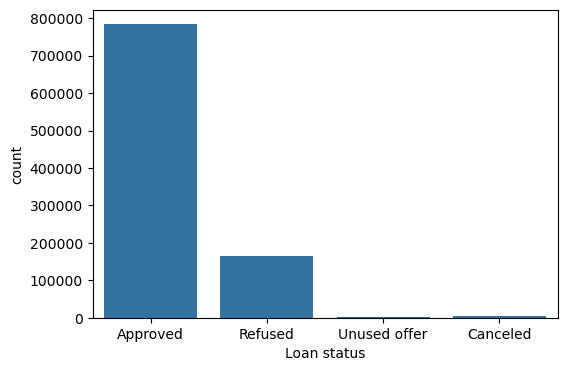

In [4]:
# Plotting Countplot on previous loan status
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')
plt.show()

#### Analysis
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

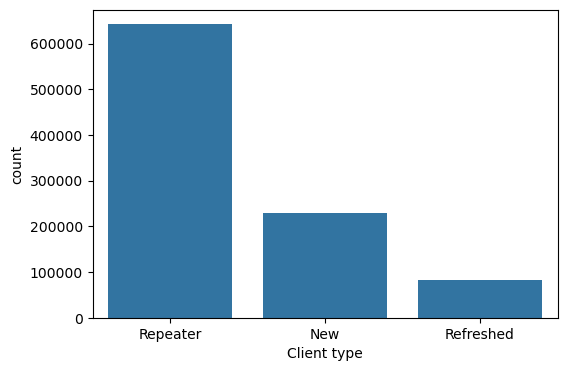

In [5]:
# Plotting Countplot on client type
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')
plt.show()

#### Analysis
Mostly the applicants were `Repeater`

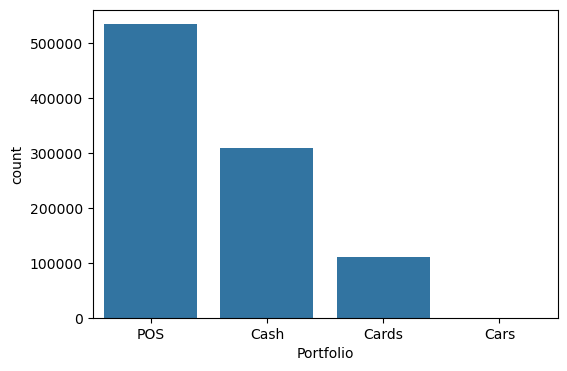

In [6]:
# Plotting Countplot on Portfolio of previous applications
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')
plt.show()

#### Analysis
The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

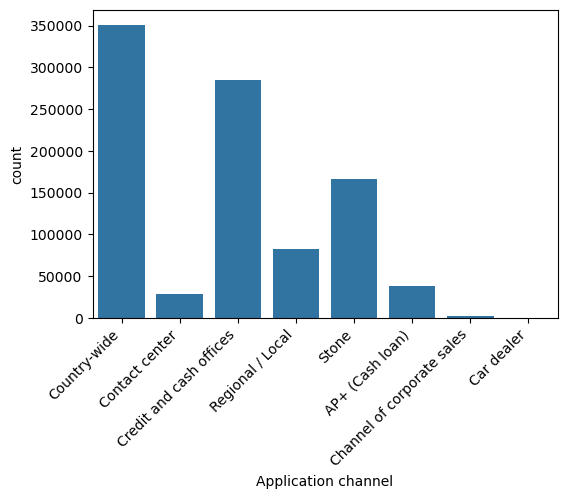

In [7]:
# Plotting Countplot on Application channel type
plt.figure(figsize=(6,4))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')
plt.show()

#### Analysis
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

## 2.2 Univariate analysis for continuous variables

### 2.2.1 Applied loan amount

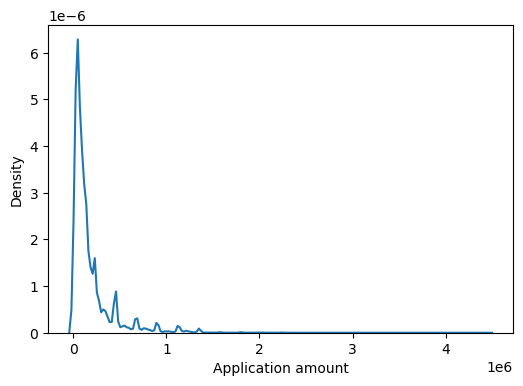

In [8]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')
plt.show()

#### Analysis
The plot is right skewed and most of the application amount is between 0 and 1000000

### 2.2.2 Credited loan amount

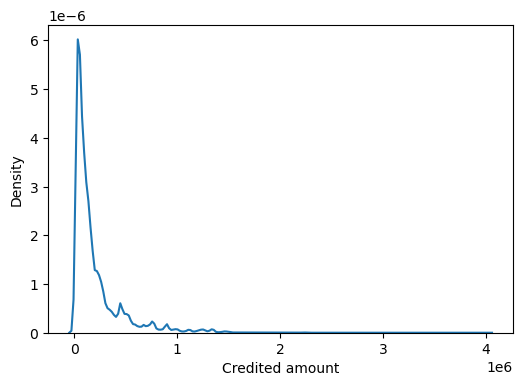

In [9]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')
plt.show()

#### Analysis
Distribution is right skewed and most of the credited amounts is between 0 and 1000000

### 2.2.3 Months took for the pervious application decision relative to the current application 

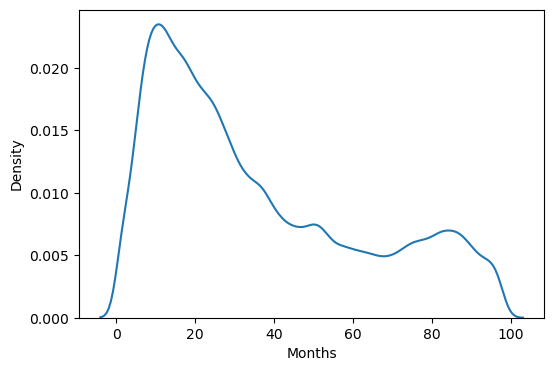

In [10]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')
plt.show()

#### Analysis
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## 2.3 Bivariate analysis

### 2.3.1 Corelation of relevant numerical columns

In [11]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [12]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12,3
1,607500.0,679671.0,25188.615,111.88,36,6
2,112500.0,136444.5,15060.735,121.28,12,11
3,337500.0,404055.0,31924.395,119.72,24,27
4,315000.0,340573.5,23703.930,108.12,18,23


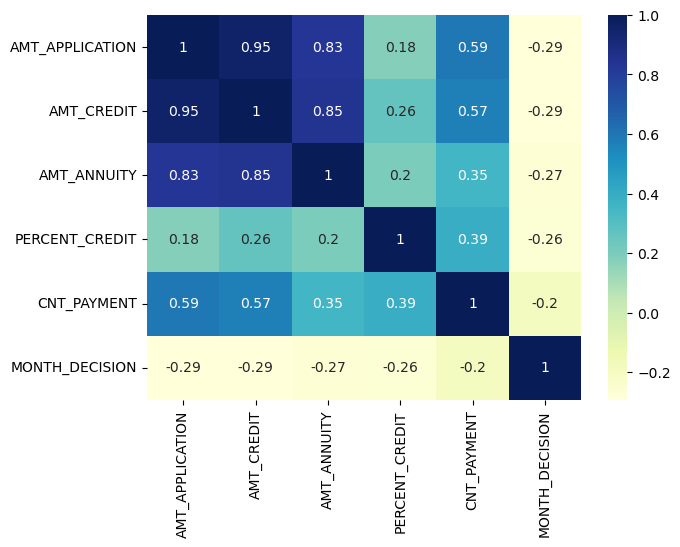

In [13]:
# Plotting heatmap with correlation matrix
plt.figure(figsize=(7,5))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT (0.95)
2. AMT_CREDIT and AMT_ANNUITY (0.85)
3. AMT_APPLICATION and AMT_ANNUITY (0.83)	

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT (0.59)
2. AMT_CREDIT and CNT_PAYMENT (0.57)

### 2.3.2 Bivariate analysis on continuous variable

#### 2.3.2.1 Application amount and credited amount

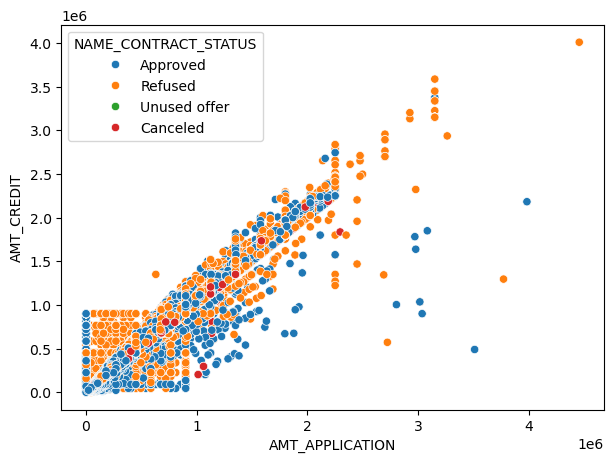

In [14]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

#### Analysis
As the application amount increases, the credited amount increases as well and there is spread of approved and refused loans on the higher application amounts

#### 2.3.2.2 Application amount and the month taken to take decision related to current application

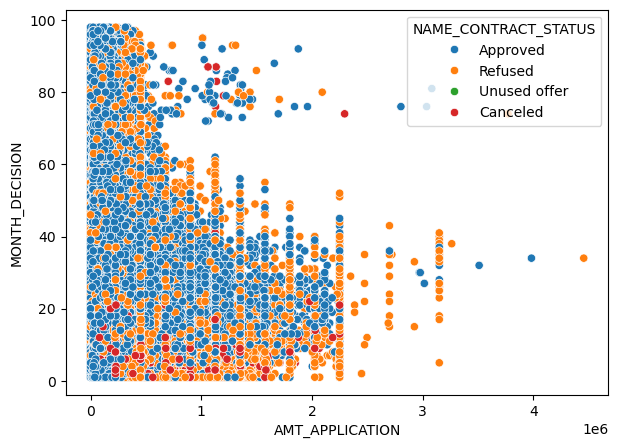

In [15]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

#### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

### 2.3.3 Bivariate analysis on categorical variable

#### 2.3.3.1 Credit amount of the loan of various categories

In [16]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

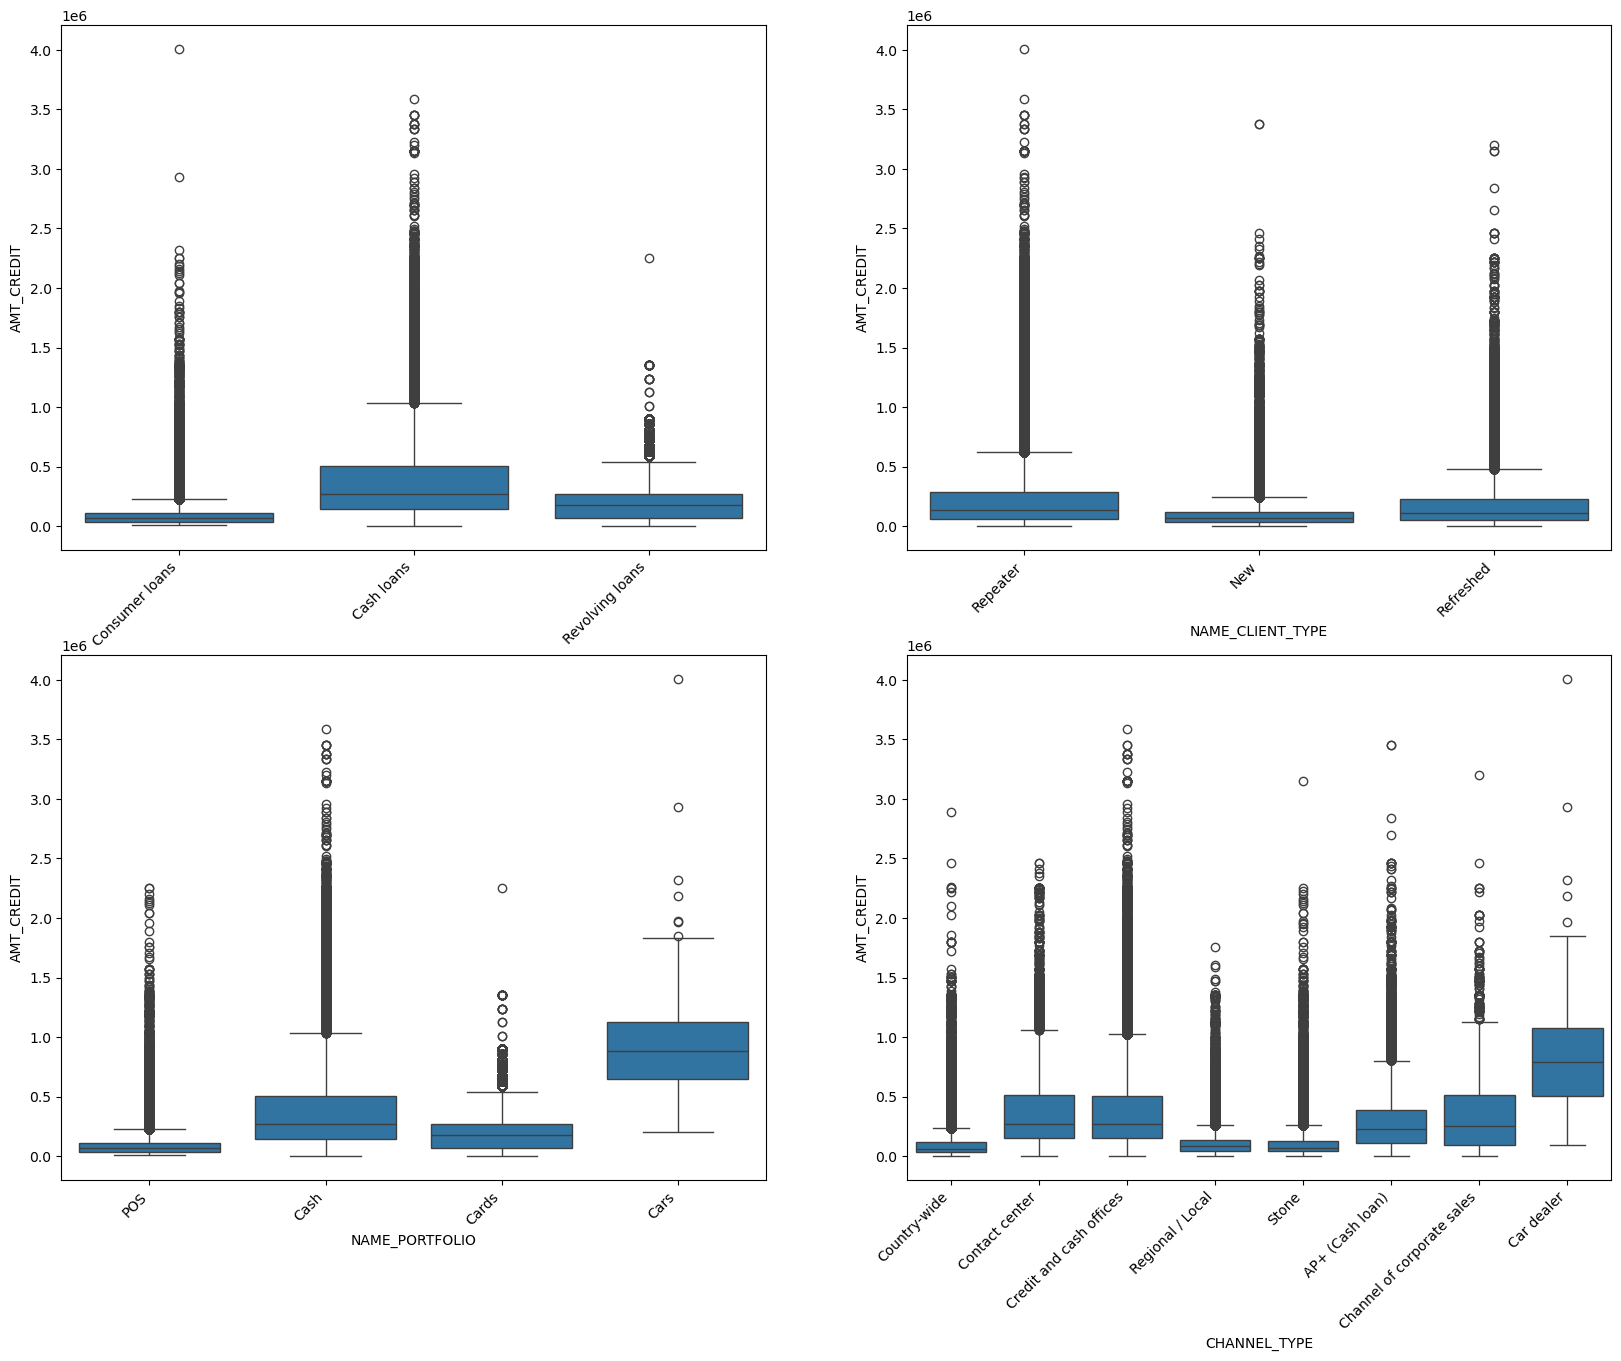

In [17]:
plt.figure(figsize=(20,15))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

#### Analysis
1. Outliers: All plots exhibit a significant number of outliers, implying that some individuals or cases involve extraordinarily high credit amounts.
2. AMT_CREDIT Distribution: The credit distribution across different categories shows variability, with certain segments (e.g., Cash loans, Cars           portfolio, Car Dealer channel) consistently associated with higher credit amounts.

### 2.3.4 Analysis of two segmented variables

#### 2.3.4.1 Status and Client type

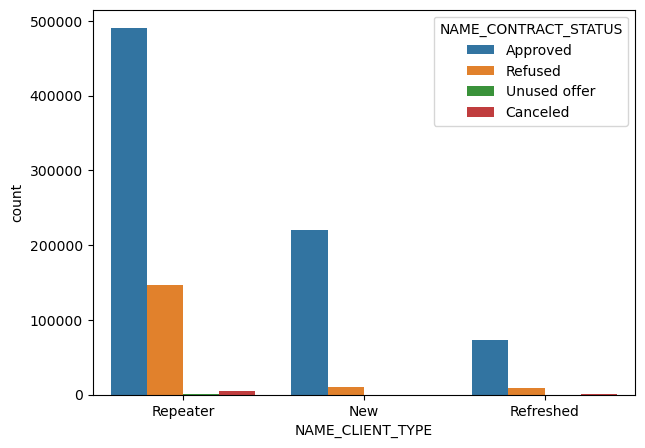

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )
plt.show()

#### Analysis
Among all the categories of clients, Clients who has repeated the loan has more count in all contract status.

#### 2.3.4.2 Current loan defaulter status with respect to previous loan application status

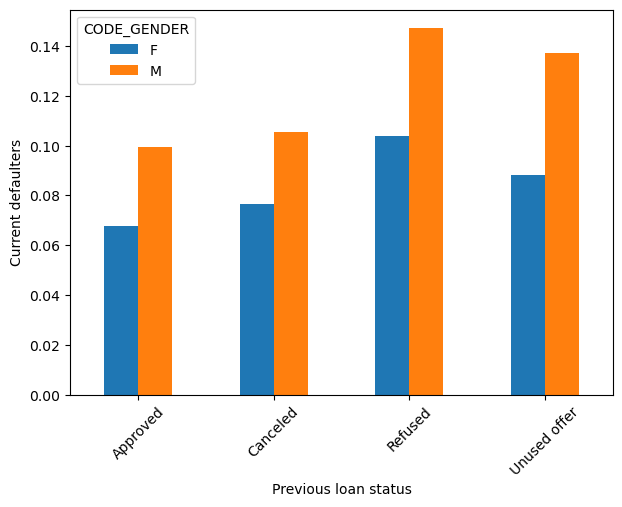

In [19]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### 2.3.4.3 Current loan defaulter status with respect to previous loan application status and client types

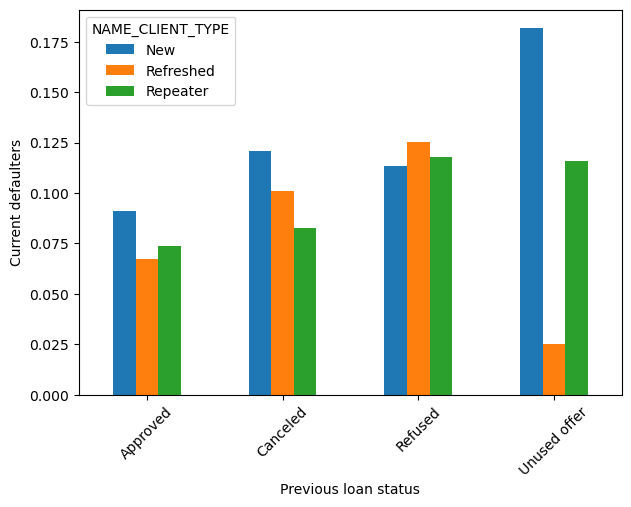

In [20]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
1. We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### 2.3.4.4 Current loan defaulter status with respect to previous loan application status and age group

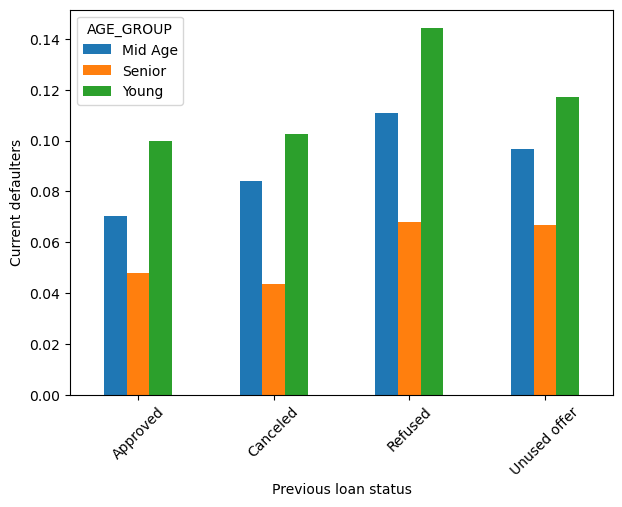

In [22]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### 2.3.4.5 Current loan defaulter status with respect to previous loan application status and income group

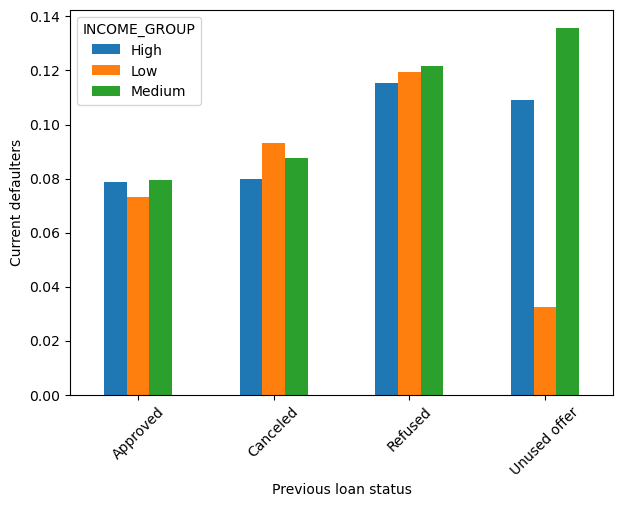

In [23]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### 2.3.4.6 Current loan defaulter status with respect to previous loan application status and portfolio of the loan

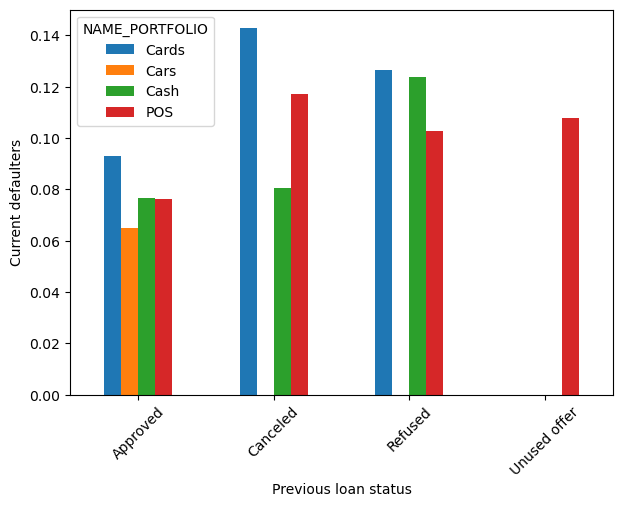

In [24]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For approved loan status the clients applied for `Cars` are less defaulted.
3. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### 2.3.4.7 Current loan defaulter status with respect to previous loan application status and external source score category

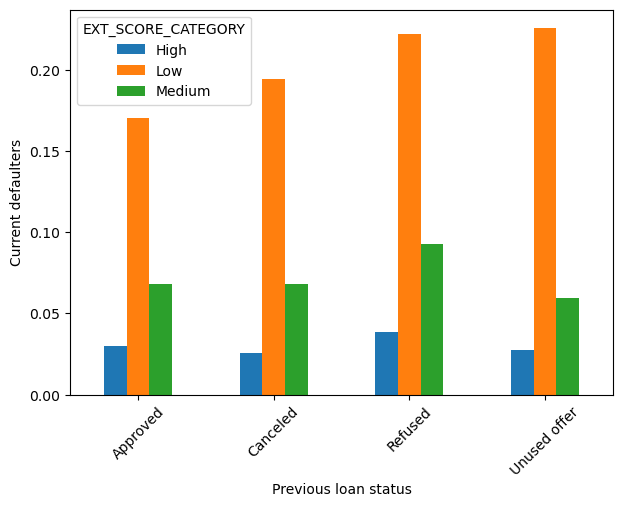

In [25]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(7,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

#### Analysis
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very ulikely to default irrespective of their previous loan status.